# Notebook for exploring the heatmap results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [7]:
base_dir = '../../'
paths = {
# standard resutls (internal, external)
'p1':'results/evaluation_test/plots/roc_summary_subsampled.csv',
# model pooling / ensembling:
'p2': 'results/evaluation_test/prediction_pooled_subsampled/max/plots/roc_summary_subsampled.csv',
# finetuned models on 10%:
'p3': 'results/finetuning/evaluation_test/plots/roc_summary_subsampled.csv',
# baseline (of finetuning) on 10%:
'p4': 'results/finetuning/evaluation_test/baseline/plots/roc_summary_subsampled.csv',
# finetuned models on 10%:
'p5': 'results/finetuning_0_20/evaluation_test/plots/roc_summary_subsampled.csv',
# baseline (of finetuning) on 10%:
'p6': 'results/finetuning_0_20/evaluation_test/baseline/plots/roc_summary_subsampled.csv',

}
paths = {key: os.path.join(base_dir, val) for key, val in paths.items()}

In [6]:
ls ../../results/finetuning_0_20/evaluation_test/

baselines/ plots/


In [9]:
paths

{'p1': '../../results/evaluation_test/plots/roc_summary_subsampled.csv',
 'p2': '../../results/evaluation_test/prediction_pooled_subsampled/max/plots/roc_summary_subsampled.csv',
 'p3': '../../results/finetuning/evaluation_test/plots/roc_summary_subsampled.csv',
 'p4': '../../results/finetuning/evaluation_test/baseline/plots/roc_summary_subsampled.csv',
 'p5': '../../results/finetuning_0_20/evaluation_test/plots/roc_summary_subsampled.csv',
 'p6': '../../results/finetuning_0_20/evaluation_test/baseline/plots/roc_summary_subsampled.csv'}

In [11]:
dfs = {key: pd.read_csv(val) for key,val in paths.items()} 

In [14]:
dfs = {key: df.drop(columns='Unnamed: 0') for key, df in dfs.items()}

In [15]:
[df.columns for k, df in dfs.items()]

[Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object')]

In [24]:
dfs['p3']['finetuned'] = True
dfs['p1']['finetuned'] = False
dfs['p2']['finetuned'] = False
dfs['p4']['finetuned'] = False
dfs['p5']['finetuned'] = True
dfs['p6']['finetuned'] = False

In [16]:
# indicator if it's the finetuning baseline:
dfs['p3']['baseline'] = False
dfs['p1']['baseline'] = False
dfs['p2']['baseline'] = False
dfs['p4']['baseline'] = True
dfs['p5']['baseline'] = False
dfs['p6']['baseline'] = True

In [19]:
# finetuning size: (training size for baseline)
dfs['p3']['finetuning_size'] = 0.10
dfs['p1']['finetuning_size'] = np.nan
dfs['p2']['finetuning_size'] = np.nan
dfs['p4']['finetuning_size'] = 0.10
dfs['p5']['finetuning_size'] = 0.02
dfs['p6']['finetuning_size'] = 0.02

In [20]:
dfs['p1']

,model,train_dataset,eval_dataset,auc_mean,auc_std,baseline,finetuning_size
0,AttentionModel,aumc,aumc,0.917711,0.003569,False,NaN
1,GRUModel,aumc,aumc,0.856986,0.014407,False,NaN
2,lgbm,aumc,aumc,0.893829,0.004515,False,NaN
3,lr,aumc,aumc,0.883245,0.001715,False,NaN
4,mews,aumc,aumc,0.718061,0.000000,False,NaN
...,...,...,...,...,...,...,...
175,mews,mimic,mimic,0.609294,0.000000,False,NaN
176,news,mimic,mimic,0.652844,0.000000,False,NaN
177,qsofa,mimic,mimic,0.565961,0.000000,False,NaN
178,sirs,mimic,mimic,0.609423,0.000000,False,NaN


In [25]:
df = pd.concat(dfs)

In [26]:
# we look at the attn model:
df = df.query("model == 'AttentionModel'")
# drop obsolete dataset (too heterogenous / low quality)
df = df.query("train_dataset != 'emory' & eval_dataset != 'emory'")

In [27]:
df

model train_dataset eval_dataset  auc_mean   auc_std  \
p1 0    AttentionModel          aumc         aumc  0.917711  0.003569   
   9    AttentionModel          aumc         eicu  0.698006  0.010686   
   22   AttentionModel          aumc        hirid  0.733108  0.013438   
   31   AttentionModel          aumc        mimic  0.685606  0.013133   
   40   AttentionModel          eicu         aumc  0.731821  0.007108   
   49   AttentionModel          eicu         eicu  0.802502  0.003536   
   62   AttentionModel          eicu        hirid  0.705312  0.026872   
   71   AttentionModel          eicu        mimic  0.714940  0.009202   
   100  AttentionModel         hirid         aumc  0.806525  0.014401   
   109  AttentionModel         hirid         eicu  0.705568  0.009348   
   122  AttentionModel         hirid        hirid  0.834322  0.002237   
   131  AttentionModel         hirid        mimic  0.648077  0.012512   
   140  AttentionModel         mimic         aumc  0.798606  0.022978   
   149  AttentionModel         mimic         eicu  0.753329  0.007784   
   162  AttentionModel         mimic        hirid  0.694860  0.010384   
   171  AttentionModel         mimic        mimic  0.831972  0.003256   
p2 0    AttentionModel        pooled         aumc  0.835573  0.010908   
   9    AttentionModel        pooled         eicu  0.759670  0.006823   
   18   AttentionModel        pooled        hirid  0.729156  0.013789   
   27   AttentionModel        pooled        mimic  0.720870  0.005167   
p3 0    AttentionModel          aumc         eicu  0.756370  0.007211   
   1    AttentionModel          aumc        hirid  0.792255  0.002184   
   2    AttentionModel          aumc        mimic  0.786427  0.002008   
   3    AttentionModel          eicu         aumc  0.846289  0.050213   
   4    AttentionModel          eicu        hirid  0.774104  0.001855   
   5    AttentionModel          eicu        mimic  0.789502  0.002433   
   6    AttentionModel         hirid         aumc  0.867947  0.010989   
   7    AttentionModel         hirid         eicu  0.761983  0.004556   
   8    AttentionModel         hirid        mimic  0.794380  0.002116   
   9    AttentionModel         mimic         aumc  0.894071  0.003426   
   10   AttentionModel         mimic         eicu  0.793121  0.003726   
   11   AttentionModel         mimic        hirid  0.797083  0.004061   
p4 0    AttentionModel          aumc         aumc  0.829317  0.004322   
   1    AttentionModel          eicu         eicu  0.729738  0.005943   
   2    AttentionModel         hirid        hirid  0.787233  0.001456   
   3    AttentionModel         mimic        mimic  0.782670  0.002296   
p5 0    AttentionModel          aumc         eicu  0.724866  0.003635   
   1    AttentionModel          aumc        hirid  0.774966  0.002813   
   2    AttentionModel          aumc        mimic  0.699866  0.023450   
   3    AttentionModel          eicu         aumc  0.773791  0.041005   
   4    AttentionModel          eicu        hirid  0.729016  0.010541   
   5    AttentionModel          eicu        mimic  0.724120  0.011153   
   6    AttentionModel         hirid         aumc  0.844473  0.011185   
   7    AttentionModel         hirid         eicu  0.742710  0.006265   
   8    AttentionModel         hirid        mimic  0.737982  0.009524   
   9    AttentionModel         mimic         aumc  0.843931  0.013971   
   10   AttentionModel         mimic         eicu  0.780288  0.002248   
   11   AttentionModel         mimic        hirid  0.782912  0.003641   
p6 0    AttentionModel          aumc         aumc  0.807556  0.006384   
   1    AttentionModel          eicu         eicu  0.711287  0.003618   
   2    AttentionModel         hirid        hirid  0.763304  0.001136   
   3    AttentionModel         mimic        mimic  0.745647  0.002570   

        baseline  finetuning_size  finetuned  
p1 0       False              NaN      False  
   9       False              NaN      False  
   22 

In [28]:
# mean internal AUC
auc_int_mean = df.query("train_dataset == eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")['auc_mean'].mean()
auc_int_std = df.query("train_dataset == eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")['auc_std'].mean() # use bootstraps for CI?

In [29]:
auc_int_mean

0.8466267443625092

In [30]:
# mean pair-wise AUC (no finetuning, no pooling)
auc_pw_mean = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")['auc_mean'].mean()
auc_pw_std = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")['auc_std'].mean()

In [31]:
auc_pw_mean

0.7229798509928985

In [15]:
auc_pw_mean

0.7229798509928985

In [32]:
# mean pooled AUC (no finetuning)
auc_po_mean = df.query("train_dataset == 'pooled' & finetuned == False & baseline == False")['auc_mean'].mean()
auc_po_std = df.query("train_dataset == 'pooled' & finetuned == False & baseline == False")['auc_std'].mean()


In [17]:
auc_po_mean

0.7613171965323347

## finetuning on 10%

In [36]:
# mean finetuned AUC 10% 
auc_ft10_mean = df.query("train_dataset != 'pooled' & finetuned == True & baseline == False & finetuning_size == 0.10")['auc_mean'].mean()
auc_ft10_std = df.query("train_dataset != 'pooled' & finetuned == True & baseline == False & finetuning_size == 0.10")['auc_std'].mean()


In [46]:
def get_ft(ft_size=0.10):
    return df.query("train_dataset != 'pooled' & finetuned == True & baseline == False & finetuning_size == @ft_size")

In [49]:
df_ft10 = get_ft(0.10)
auc_ft10_mean = df_ft10['auc_mean'].mean()
auc_ft10_std = df_ft10['auc_std'].std()


In [50]:
auc_ft10_mean

0.8044610478536885

In [19]:
auc_ft_mean

0.8044610478536885

In [38]:
# mean baseline AUC (internally trained on finetuning data) 10% size
auc_base10_mean = df.query("train_dataset != 'pooled' & finetuned == False & baseline == True & finetuning_size == 0.10")['auc_mean'].mean()
auc_base10_std =  df.query("train_dataset != 'pooled' & finetuned == False & baseline == True & finetuning_size == 0.10")['auc_std'].mean()

In [51]:
def get_baseline(ft_size=0.10):
    return df.query("train_dataset != 'pooled' & finetuned == False & baseline == True & finetuning_size == @ft_size")

In [59]:
df_base10 = get_baseline(0.10)
auc_base10_mean = df_base10['auc_mean'].mean()
auc_base10_std = df_base10['auc_std'].mean()

In [56]:
auc_base10_mean

0.7822397449362146

In [21]:
auc_base_mean 

0.7822397449362146

## finetuning on 2%

In [57]:
df_ft2 = get_ft(0.02)
auc_ft2_mean = df_ft2['auc_mean'].mean()
auc_ft2_std = df_ft2['auc_std'].std()

In [58]:
auc_ft2_mean

0.7632434823574795

In [60]:
df_base2 = get_baseline(0.02)
auc_base2_mean = df_base2['auc_mean'].mean()
auc_base2_std = df_base2['auc_std'].mean()

In [65]:
auc_base2_mean

0.7569484196682784

Text(20.75, 0.5, 'AUROC (mean $\\pm$ std)')

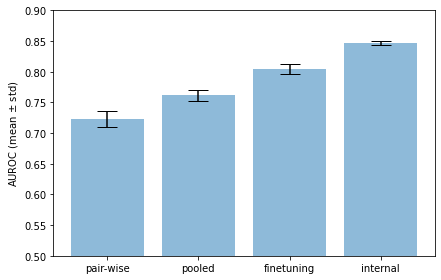

In [71]:
fig, ax = plt.subplots()
x_pos = np.arange(4)
aucs = [auc_pw_mean, auc_po_mean, auc_ft_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning', 'internal']
ax.bar(x_pos, aucs, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylim(0.5,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

Text(14.375, 0.5, 'AUROC (mean $\\pm$ std)')

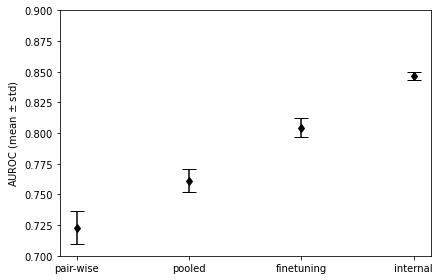

In [96]:
fig, ax = plt.subplots()
x_pos = np.arange(4)
aucs = [auc_pw_mean, auc_po_mean, auc_ft_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning', 'internal']
ax.errorbar(x_pos, aucs, yerr=stds, ecolor='black', capsize=7, fmt='d', color='black')
ax.set_ylim(0.7,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

SyntaxError: invalid non-printable character U+200B (347523906.py, line 9)

Text(14.375, 0.5, 'AUROC (mean $\\pm$ std)')

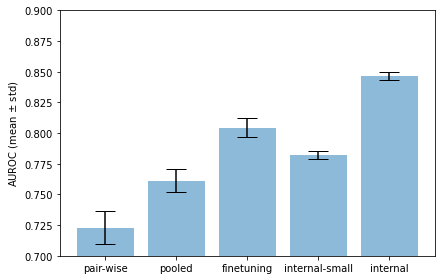

In [27]:
fig, ax = plt.subplots()
x_pos = np.arange(5)
aucs = [auc_pw_mean, auc_po_mean, auc_ft_mean, auc_base_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft_std, auc_base_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning', 'internal-small', 'internal']
ax.bar(x_pos, aucs, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylim(0.7,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

Text(0.5, 1.0, 'Performance across datasets')

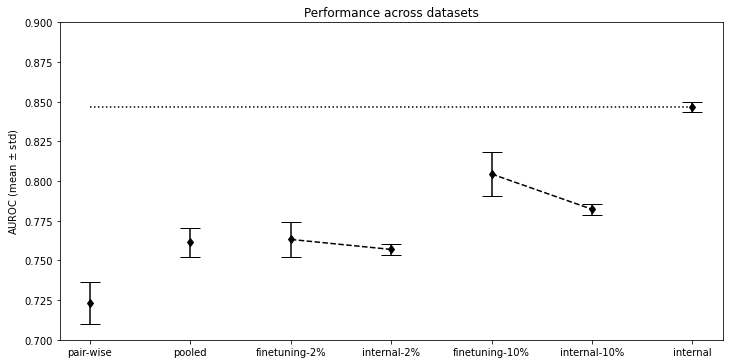

In [130]:
fig, ax = plt.subplots(figsize=(10,5))
x_pos = np.arange(7)
aucs = [auc_pw_mean, auc_po_mean, auc_ft2_mean, auc_base2_mean, auc_ft10_mean, auc_base10_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft2_std, auc_base2_std, auc_ft10_std, auc_base10_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning-2%', 'internal-2%', 'finetuning-10%', 'internal-10%', 'internal']
ax.errorbar(x_pos, aucs, yerr=stds, ecolor='black', capsize=10, fmt='d', color='black')
ax.set_ylim(0.7,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

plt.plot((2,3), (auc_ft2_mean, auc_base2_mean), '--', color='black')
plt.plot((4,5), (auc_ft10_mean, auc_base10_mean), '--', color='black')
plt.hlines(auc_int_mean, 0,6, color='black', linestyle='dotted')

plt.title('Performance across datasets')

# Notes

- csv of these results
- plot with increasingly smaller finetuning split
- check nemati paper again
- how much data collection can be prevented using pretraining?

# TO